<a href="https://colab.research.google.com/github/kato-taki/optimization-of-cultured-meat/blob/main/%E3%83%99%E3%82%A4%E3%82%BA%E6%9C%80%E9%81%A9%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pip install
$x = 1$

In [13]:
!pip install GPy
!pip install GPyOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 886.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83588 sha256=84ed0be1fb4f22c51300f9fe9b5f1a86bb689924832ec756170d3e52c681c7ec
  Stored in directory: /root/.cache/pip/wheels/72/17/52/9d818b4c60f733bf49d5cf82bc2758ebbdc57a0471137c37be
Successfully built GPyOpt


In [14]:
#ベイズ最適化を呼び出す関数
import numpy as np
import matplotlib.pyplot as plt
import GPyOpt
import time

# 初期化

In [15]:
#2.1
#主要入力パラメータの平均値（X0, μmax, C0, q(ΔC/ΔX), 酸加水分解抽出定数k）

#動物細胞培養
#播種密度
X0_cell =79126667 #cells/L
#最大比増殖速度
umax_cell = 0.0207382 #h-1
#液性因子濃度
Cglc0_cell = 23.21599059 #mmol/L
Clac0_cell = 4.688425 #mmol/L
Cgln0_cell = 2.004125 #mmol/L
Camm0_cell = 0.571 #mmol/L
#主要成分（グルコース，乳酸，グルタミン，アンモニア）のΔC/ΔX（増殖した細胞数に対する生成もしくは消費された成分の物質量）
qglc_cell = 0.0000000519922
qlac_cell = 0.0000000908415
qgln_cell = 0.00000000460546
qamm_cell = 0.000000000427268  #0.000000000256415


#微細藻類培養
#播種密度
X0_algae = 5000000  #cells/L
#最大比増殖速度
umax_algae =0.002487426  #h-1, 0.00507596
#液性因子濃度
Cglc0_algae = 23.21599059 #mmol/L
Clac0_algae = 26.2 #mmol/L
Cgln0_algae = 2.004125 #mmol/L
Camm0_algae = 1.078425 #mmol/L, 0.571
#主要成分（乳酸，アンモニア，グルタミン）のΔC/ΔX（増殖した細胞数に対する生成された成分の物質量）
qlac_algae = 0.00000372270 # ΔClac/ΔX
qgln_algae = 0.0000000173518 #ΔCgln/ΔX,0.00000000487716 #0.0000000173518
qamm_algae =0.000000336862 # ΔClac/ΔX


#微細藻類酸加水分解
#酸加水分解によるグルコース抽出定数
kglc = 0.0000000368038  #mmol/cells

In [16]:
#2.2
#主要入力パラメータの標準偏差SD（X0, μmax, C0, q(ΔC/ΔX), 酸加水分解抽出定数k）

#動物細胞培養
#播種密度
SD_X0_cell =X0_cell*0.1
#最大比増殖速度
SD_umax_cell = umax_cell*0.1
#主要成分のΔC/ΔX
SD_qglc_cell = qglc_cell*0.1
SD_qgln_cell = qgln_cell*0.1
SD_qlac_cell = qlac_cell*0.1
SD_qamm_cell = qamm_cell*0.1


#微細藻類培養
#播種密度
SD_X0_algae = X0_algae*0.1
#最大比増殖速度
SD_umax_algae = umax_algae*0.1
#主要成分のΔC/ΔX
SD_qlac_algae = qlac_algae*0.1
SD_qamm_algae = qamm_algae*0.1
SD_qgln_algae = qgln_algae*0.1


#微細藻類酸加水分解
#酸加水分解によるグルコース抽出定数
SD_kglc = kglc*0.1

#液性因子濃度
#動物細胞
SD_Cglc0_cell = Cglc0_cell*0.1
SD_Cgln0_cell = Cgln0_cell*0.1
SD_Clac0_cell = Clac0_cell*0.1
SD_Camm0_cell = Camm0_cell*0.1

#微細藻類
SD_Cglc0_algae = Cglc0_algae*0.1
SD_Clac0_algae = Clac0_algae*0.1
SD_Cgln0_algae = Cgln0_algae*0.1
SD_Camm0_algae = Camm0_algae*0.1

In [17]:
#2.3
#アミノ酸関連入力パラメータの平均値（C0, q(ΔC/ΔX)
#動物細胞培養

#アミノ酸濃度
Casp0 = 6.16667/1000 #mmol/L
Cthr0 = 776.3/1000 #mmol/L
Cser0 = 297.0333/1000 #mmol/L
Casn0 = 6.86667/1000 #mmol/L
Cglu0 = 105.2667/1000 #mmol/L
Cpro0 = 68/1000 #mmol/L
Cgly0 = 549.3333/1000 #mmol/L
Cala0 = 517.5333/1000 #mmol/L
Cval0 = 770.6333/1000 #mmol/L
Ccys0 = 150.9333/1000 #mmol/L
Cmet0 = 188/1000 #mmol/L
Cile0 = 727.5333/1000 #mmol/L
Cleu0 = 701.8333/1000 #mmol/L
Ctyr0 = 396.1667/1000 #mmol/L
Cphe0 = 387.3333/1000 #mmol/L
Chis0 = 184.3/1000 #mmol/L
Ctrp0 = 72.66667/1000 #mmol/L
Clys0 = 781.6/1000 #mmol/L
Carg0 = 339.0667/1000 #mmol/L

#アミノ酸のΔC/ΔX（増殖した細胞数に対する生成もしくは消費された成分の物質量）
qasp_cell = 0.0000000255607033891075/1000
qthr_cell = 0.000000315847394310808/1000
qser_cell = 0.00000112273662562101/1000
qasn_cell = 0.000000101690149699368/1000
qglu_cell = 0.00000105144298806004/1000
qpro_cell = 0.000000713350873502497/1000
qgly_cell = 0.000000641366406120199/1000
qala_cell = 0.0000000925711960578484/1000
qval_cell = 0.000000414083394903541/1000
qcys_cell = 0.000000481646551429344/1000
qmet_cell = 0.000000202551303613144/1000
qile_cell = 0.000000563578968238753/1000
qleu_cell = 0.000000507207254818452/1000
qtyr_cell = 0.00000021540073828983/1000
qphe_cell = 0.000000197300996971057/1000
qhis_cell = 0.000000108874779841171/1000
qtrp_cell = 0.0000000375811422802013/1000
qlys_cell = 0.000000573665083630132/1000
qarg_cell = 0.000000399299636727138/1000

In [18]:
#2.4
#アミノ酸関連入力パラメータの標準偏差SD（C0, q(ΔC/ΔX)
#動物細胞培養

#アミノ酸濃度
SD_Casp0 = Casp0*0.1
SD_Cthr0 = Cthr0*0.1
SD_Cser0 = Cser0*0.1
SD_Casn0 = Casn0*0.1
SD_Cglu0 = Cglu0*0.1
SD_Cpro0 = Cpro0*0.1
SD_Cgly0 = Cgly0*0.1
SD_Cala0 = Cala0*0.1
SD_Cval0 = Cval0*0.1
SD_Ccys0 = Ccys0*0.1
SD_Cmet0 = Cmet0*0.1
SD_Cile0 = Cile0*0.1
SD_Cleu0 = Cleu0*0.1
SD_Ctyr0 = Ctyr0*0.1
SD_Cphe0 = Cphe0*0.1
SD_Chis0 = Chis0*0.1
SD_Ctrp0 = Ctrp0*0.1
SD_Clys0 = Clys0*0.1
SD_Carg0 = Carg0*0.1

#アミノ酸のΔC/ΔX（増殖した細胞数に対する生成もしくは消費された成分の物質量）
SD_qasp_cell = qasp_cell*0.1
SD_qthr_cell = qthr_cell*0.1
SD_qser_cell = qser_cell*0.1
SD_qasn_cell = qasn_cell*0.1
SD_qglu_cell = qglu_cell*0.1
SD_qpro_cell = qpro_cell*0.1
SD_qgly_cell = qgly_cell*0.1
SD_qala_cell = qala_cell*0.1
SD_qval_cell = qval_cell*0.1
SD_qcys_cell = qcys_cell*0.1
SD_qmet_cell = qmet_cell*0.1
SD_qile_cell = qile_cell*0.1
SD_qleu_cell = qleu_cell*0.1
SD_qtyr_cell = qtyr_cell*0.1
SD_qphe_cell = qphe_cell*0.1
SD_qhis_cell = qhis_cell*0.1
SD_qtrp_cell = qtrp_cell*0.1
SD_qlys_cell = qlys_cell*0.1
SD_qarg_cell = qarg_cell*0.1

In [19]:
#2.5
#アミノ酸関連入力パラメータの平均値（C0, q(ΔC/ΔX)
#藻類培養

#アミノ酸濃度は動物細胞培養と等しいとする

#アミノ酸のΔC/ΔX（増殖した細胞数に対する生成もしくは消費された成分の物質量）
qasp_algae = 0.0000021555/1000
qthr_algae = 0.00000892992/1000
qser_algae = 0.000015853/1000
qasn_algae = 0.000000244219/1000
qglu_algae = 0.000109145/1000
qpro_algae = 0.000000509675/1000
qgly_algae = 0.00000131666/1000
qala_algae = 0.000114639/1000
qval_algae = 0.00000318547/1000
qcys_algae = 0.0000077513/1000
qmet_algae = 0.00000182633/1000
qile_algae = 0.0000731595/1000
qleu_algae = 0.000128119/1000
qtyr_algae = 0.0000342013/1000
qphe_algae = 0.0000747523/1000
qhis_algae = 0.00000158211/1000
qtrp_algae = 0.000000785748/1000
qlys_algae = 0.0000164264/1000
qarg_algae = 0.0000134958/1000

In [20]:
#2.6
#アミノ酸関連入力パラメータの標準偏差SD（C0, q(ΔC/ΔX)
#藻類培養

#アミノ酸のΔC/ΔX（増殖した細胞数に対する生成もしくは消費された成分の物質量）
SD_qasp_algae = qasp_algae*0.1
SD_qthr_algae = qthr_algae*0.1
SD_qser_algae = qser_algae*0.1
SD_qasn_algae = qasn_algae*0.1
SD_qglu_algae = qglu_algae*0.1
SD_qpro_algae = qpro_algae*0.1
SD_qgly_algae = qgly_algae*0.1
SD_qala_algae = qala_algae*0.1
SD_qval_algae = qval_algae*0.1
SD_qcys_algae = qcys_algae*0.1
SD_qmet_algae = qmet_algae*0.1
SD_qile_algae = qile_algae*0.1
SD_qleu_algae = qleu_algae*0.1
SD_qtyr_algae = qtyr_algae*0.1
SD_qphe_algae = qphe_algae*0.1
SD_qhis_algae = qhis_algae*0.1
SD_qtrp_algae = qtrp_algae*0.1
SD_qlys_algae = qlys_algae*0.1
SD_qarg_algae = qarg_algae*0.1

In [21]:
#2.7
#微細藻類酸加水分解
#酸加水分解によるアミノ酸抽出定数

karg = 0.00000035389651591266
kcys = 0.00000000082688269010
kgln = 0
kgly = 0.00000033608571327452
khis = 0.00000001112629904437
kile = 0.00000002167703789498
kleu = 0.00000008657198663972
klys = 0.00000006415021905454
kmet = 0.00000001378521467889
kphe = 0.00000003389591453994
kser = 0.00000011598565709608
kthr = 0.00000005691521618453
ktrp = 0.00000000300615783636
ktyr = 0.00000003255428256531
kval = 0.00000002928762172894
kasp = 0.00000141772894973964
kasn = 0.00000000127178094158
kglu = 0.00000046126670033609
kpro = 0.00000006940097955609
kala = 0.00000032934131130655

In [22]:
#2.8
#藻類酸加水分解によるアミノ酸抽出定数の標準偏差SD

SD_kasp = kasp*0.1
SD_kthr = kthr*0.1
SD_kser = kser*0.1
SD_kasn = kasn*0.1
SD_kglu = kglu*0.1
SD_kpro = kpro*0.1
SD_kgly = kgly*0.1
SD_kala = kala*0.1
SD_kval = kval*0.1
SD_kcys = kcys*0.1
SD_kmet = kmet*0.1
SD_kile = kile*0.1
SD_kleu = kleu*0.1
SD_ktyr = ktyr*0.1
SD_kphe = kphe*0.1
SD_khis = khis*0.1
SD_ktrp = ktrp*0.1
SD_klys = klys*0.1
SD_karg = karg*0.1

In [23]:
#2.9

#速度式の各定数の値（飽和定数K, 劣化定数k)
#飽和定数
#動物細胞
Kglc = 0.75
Klac_cell = 172
Kgln = 0.075
Kamm_cell = 28.48
#微細藻類
Kamm_algae = 0.0135 #文献より
Klac_algae = 0 #7.77
#劣化，生成に関する項
uptake_max = 0.0000000156#mM
Klac_uptake = 1.31#mM
kd_gln = 0.001 #論文から引用，フィッティングの結果妥当性確認

In [24]:
#3. sample generating of input paramer
minimum_cell = 1*10 #×10^6 cells/L
maximum_cell = 1*100 #10^6 cells/L
scale_cell = maximum_cell - minimum_cell

#minimum_algae = 5 #×10^6 cells/L
#maximum_algae = 5*100 #10^6 cells/L
#scale_algae = maximum_algae - minimum_algae


run_number =  10
cycle_num = 10


#藻類細胞密度のうち，酸加水分解反応に用いる割合．(割合はシミュレーションを回しながら調整)
k_hydrolysis = 1/4

In [25]:
#4. Lists to store input,output

#input
list_input_X0_cell = []
list_input_X0_algae = []


#output
#細胞数を格納するリスト
list_output_X_cell = []
#初期細胞密度から何倍に増えたか確認するためのリスト
list_cell_yield = []
#細胞と藻類で代謝量のつり合いがとれている時間
list_time_valance = []
#比増殖速度を格納するリスト
list_u_cell = []
list_u_algae = []
#シミュレーション終了時の培地成分を格納するリスト
param_values = []

In [26]:
# 区間の分割の設定
T = 72
n = 4320
h = T / n
t = np.arange(0,T,h)

# definition of function

In [48]:
#2.10

#関数定義用コード

#動物細胞および微細藻類の増殖速度式

def get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell):
	u = umax_cell *(Cglc_cell/(Kglc+Cglc_cell*(1+Clac_cell/Klac_cell)))*(Cgln_cell/(Kgln+Cgln_cell*(1+Camm_cell/Kamm_cell)))
	return u

def get_u_algae(Camm_algae,Clac_algae):
	u= umax_algae *(Camm_algae/(Kamm_algae+Camm_algae))*(Clac_algae/(Klac_algae+Clac_algae))
	return u

# main part

## model definition
$y = f(x_1,x_2)$

In [74]:
#simulation function
#5. running model and generating output sample
#モデルを実行
def simulate_system(input_X0_cell, input_X0_algae,Cgln0_cell,Cgln0_algae,k_hydrolysis):

  #list
  list_X_i = []
  list_X_algae_i = []
  list_time_i = []
  list_time_valance_i = []


  #input
  time = 0 #timeにどんどんhを加えていく
  #サイクル数
  cycle = 0
  #培養体積比率の設定
  k = 1
  #主要入力パラメータの定義
  list_input_X0_cell.append(input_X0_cell)
  list_input_X0_algae.append(input_X0_algae)

  list_X_i.append(input_X0_cell)
  list_X_algae_i.append(input_X0_algae)
  input_umax_cell = umax_cell
  input_umax_algae = umax_algae
  Cglc_cell = Cglc0_cell
  Cglc_algae = Cglc0_algae
  Clac_cell = Clac0_cell
  Clac_algae = Clac0_algae
  Cgln_cell = Cgln0_cell
  Cgln_algae = Cgln0_algae
  Camm_cell = Camm0_cell
  Camm_algae = Camm0_algae
  input_qglc_cell = qglc_cell
  input_qlac_cell = qlac_cell
  input_qlac_algae = qlac_algae
  input_qgln_cell = qgln_cell
  input_qgln_algae = qgln_algae
  input_qamm_cell = qamm_cell
  input_qamm_algae = qamm_algae
  input_kglc = kglc

  #インプットの値をparam_valueから抽出し，定義する

  input_qasp_cell = qasp_cell
  input_qthr_cell = qthr_cell
  input_qser_cell = qser_cell
  input_qasn_cell = qasn_cell
  input_qglu_cell = qglu_cell
  input_qpro_cell = qpro_cell
  input_qgly_cell = qgly_cell
  input_qala_cell = qala_cell
  input_qval_cell = qval_cell
  input_qcys_cell = qcys_cell
  input_qmet_cell = qmet_cell
  input_qile_cell = qile_cell
  input_qleu_cell = qleu_cell
  input_qtyr_cell = qtyr_cell
  input_qphe_cell = qphe_cell
  input_qhis_cell = qhis_cell
  input_qtrp_cell = qtrp_cell
  input_qlys_cell = qlys_cell
  input_qarg_cell = qarg_cell
  Casp_cell = Casp0
  Cthr_cell = Cthr0
  Cser_cell = Cser0
  Casn_cell = Casn0
  Cglu_cell = Cglu0
  Cpro_cell = Cpro0
  Cgly_cell = Cgly0
  Cala_cell = Cala0
  Cval_cell = Cval0
  Ccys_cell = Ccys0
  Cmet_cell = Cmet0
  Cile_cell = Cile0
  Cleu_cell = Cleu0
  Ctyr_cell = Ctyr0
  Cphe_cell = Cphe0
  Chis_cell = Chis0
  Ctrp_cell = Ctrp0
  Clys_cell = Clys0
  Carg_cell = Carg0

  input_qasp_algae = qasp_algae
  input_qthr_algae = qthr_algae
  input_qser_algae = qser_algae
  input_qasn_algae = qasn_algae
  input_qglu_algae = qglu_algae
  input_qpro_algae = qpro_algae
  input_qgly_algae = qgly_algae
  input_qala_algae = qala_algae
  input_qval_algae = qval_algae
  input_qcys_algae = qcys_algae
  input_qmet_algae = qmet_algae
  input_qile_algae = qile_algae
  input_qleu_algae = qleu_algae
  input_qtyr_algae = qtyr_algae
  input_qphe_algae = qphe_algae
  input_qhis_algae = qhis_algae
  input_qtrp_algae = qtrp_algae
  input_qlys_algae = qlys_algae
  input_qarg_algae = qarg_algae
  Casp_algae = Casp0
  Cthr_algae = Cthr0
  Cser_algae = Cser0
  Casn_algae = Casn0
  Cglu_algae = Cglu0
  Cpro_algae = Cpro0
  Cgly_algae = Cgly0
  Cala_algae = Cala0
  Cval_algae = Cval0
  Ccys_algae = Ccys0
  Cmet_algae = Cmet0
  Cile_algae = Cile0
  Cleu_algae = Cleu0
  Ctyr_algae = Ctyr0
  Cphe_algae = Cphe0
  Chis_algae = Chis0
  Ctrp_algae = Ctrp0
  Clys_algae = Clys0
  Carg_algae = Carg0

  input_kasp = kasp
  input_kthr = kthr
  input_kser = kser
  input_kasn = kasn
  input_kglu = kglu
  input_kpro = kpro
  input_kgly = kgly
  input_kala = kala
  input_kval = kval
  input_kcys = kcys
  input_kmet = kmet
  input_kile = kile
  input_kleu = kleu
  input_ktyr = ktyr
  input_kphe = kphe
  input_khis = khis
  input_ktrp = ktrp
  input_klys = klys
  input_karg = karg

  #酸加水分解後の藻類濃度を格納するリスト
  #主要成分濃度
  list_Cglc_hydrolysis = []
  list_Clac_hydrolysis = []
  list_Cgln_hydrolysis = []
  list_Camm_hydrolysis = []

  #アミノ酸濃度
  list_Casp_hydrolysis = []
  list_Cthr_hydrolysis = []
  list_Cser_hydrolysis = []
  list_Casn_hydrolysis = []
  list_Cglu_hydrolysis = []
  list_Cpro_hydrolysis = []
  list_Cgly_hydrolysis = []
  list_Cala_hydrolysis = []
  list_Cval_hydrolysis = []
  list_Ccys_hydrolysis = []
  list_Cmet_hydrolysis = []
  list_Cile_hydrolysis = []
  list_Cleu_hydrolysis = []
  list_Ctyr_hydrolysis = []
  list_Cphe_hydrolysis = []
  list_Chis_hydrolysis = []
  list_Ctrp_hydrolysis = []
  list_Clys_hydrolysis = []
  list_Carg_hydrolysis = []

  #各細胞密度ごとのシミュレーション終了時の培地成分を格納するリスト
  list_medium_components = []


  for p in range(cycle_num):

    if p == 0:
      # 方程式を定める関数、初期値の定義
      f = lambda X_cell,t=0 : u_cell*X_cell
      g = lambda X_algae,t=0 : u_algae*X_algae
      gln_cell = lambda Cgln_cell,t=0 : -kd_gln*Cgln_cell
      gln_algae = lambda Cgln_algae,t=0 : -kd_gln*Cgln_algae

      # 結果を返すための配列の宣言
      ls_X_cell = np.empty(n)
      ls_X_cell[0] = input_X0_cell
      ls_X_algae = np.empty(n)
      ls_X_algae[0] = input_X0_algae
      ls_Cgln_cell = np.empty(n)
      ls_Cgln_cell[0] = Cgln_cell
      ls_Cgln_algae = np.empty(n)
      ls_Cgln_algae[0] = Cgln_algae

    else:
      # 方程式を定める関数、初期値の定義
      f = lambda X_cell,t=0 : u_cell*X_cell
      g = lambda X_algae,t=0 : u_algae*X_algae
      gln_cell = lambda Cgln_cell,t=0 : -kd_gln*Cgln_cell
      gln_algae = lambda Cgln_algae,t=0 : -kd_gln*Cgln_algae

      # 結果を返すための配列の宣言
      ls_X_cell = np.empty(n)
      ls_X_cell[0] = list_X_i[len(list_X_i)-1]
      ls_X_algae = np.empty(n)
      ls_X_algae[0] = list_X_algae_i[len(list_X_algae_i)-1]
      ls_Cgln_cell = np.empty(n)
      ls_Cgln_cell[0] = Cgln_cell
      ls_Cgln_algae = np.empty(n)
      ls_Cgln_algae[0] = Cgln_algae


    for j in range(0,n-1):


      #比増殖速度
      u_cell = get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell)
      u_algae = get_u_algae(Camm_algae,Clac_algae)

      #1. 増殖が維持されているとき
      if get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10 and get_u_algae(Camm_algae,Clac_algae) > umax_algae/10 and Cgln_cell> 0 and Cgln_algae> 0 and Cthr_cell> 0 and Cthr_algae> 0 and Cval_cell> 0 and Cval_algae> 0 and Ccys_cell> 0 and Ccys_algae> 0 and Cmet_cell> 0 and Cmet_algae> 0 and Cile_cell> 0 and Cile_algae> 0 and Cleu_cell> 0 and Cleu_algae> 0 and Ctyr_cell> 0 and Ctyr_algae> 0 and Cphe_cell> 0 and Cphe_algae> 0 and Chis_cell> 0 and Chis_algae> 0 and Clys_cell> 0 and Clys_algae> 0 and Carg_cell> 0 and Carg_algae > 0:

        #動物細胞培養（増殖速度）
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )

        #動物細胞培養（主要成分）
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h

        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h

        Cgln_cell = ls_Cgln_cell[j+1]
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h

        #動物細胞培養（アミノ酸）
        Casp_cell += input_qasp_cell*u_cell*ls_X_cell[j+1]*h
        Cthr_cell -= input_qthr_cell*u_cell*ls_X_cell[j+1]*h
        Cser_cell -= input_qser_cell*u_cell*ls_X_cell[j+1]*h
        Casn_cell += input_qasn_cell*u_cell*ls_X_cell[j+1]*h
        Cglu_cell += input_qglu_cell*u_cell*ls_X_cell[j+1]*h
        Cpro_cell += input_qpro_cell*u_cell*ls_X_cell[j+1]*h
        Cgly_cell += input_qgly_cell*u_cell*ls_X_cell[j+1]*h
        Cala_cell += input_qala_cell*u_cell*ls_X_cell[j+1]*h
        Cval_cell -= input_qval_cell*u_cell*ls_X_cell[j+1]*h
        Ccys_cell -= input_qcys_cell*u_cell*ls_X_cell[j+1]*h
        Cmet_cell -= input_qmet_cell*u_cell*ls_X_cell[j+1]*h
        Cile_cell -= input_qile_cell*u_cell*ls_X_cell[j+1]*h
        Cleu_cell -= input_qleu_cell*u_cell*ls_X_cell[j+1]*h
        Ctyr_cell -= input_qtyr_cell*u_cell*ls_X_cell[j+1]*h
        Cphe_cell -= input_qphe_cell*u_cell*ls_X_cell[j+1]*h
        Chis_cell -= input_qhis_cell*u_cell*ls_X_cell[j+1]*h
        Ctrp_cell -= input_qtrp_cell*u_cell*ls_X_cell[j+1]*h
        Clys_cell -= input_qlys_cell*u_cell*ls_X_cell[j+1]*h
        Carg_cell -= input_qarg_cell*u_cell*ls_X_cell[j+1]*h


        #微細藻類培養（増殖速度）
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )

        #微細藻類培養（主要成分）
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h

        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h

        Cgln_algae = ls_Cgln_algae[j+1]
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #藻類培養（アミノ酸）
        Casp_algae -= input_qasp_algae*u_algae*ls_X_algae[j+1]*h
        Cthr_algae -= input_qthr_algae*u_algae*ls_X_algae[j+1]*h
        Cser_algae += input_qser_algae*u_algae*ls_X_algae[j+1]*h
        Casn_algae -= input_qasn_algae*u_algae*ls_X_algae[j+1]*h
        Cglu_algae -= input_qglu_algae*u_algae*ls_X_algae[j+1]*h
        Cpro_algae += input_qpro_algae*u_algae*ls_X_algae[j+1]*h
        Cgly_algae += input_qgly_algae*u_algae*ls_X_algae[j+1]*h
        Cala_algae += input_qala_algae*u_algae*ls_X_algae[j+1]*h
        Cval_algae -= input_qval_algae*u_algae*ls_X_algae[j+1]*h
        Ccys_algae -= input_qcys_algae*u_algae*ls_X_algae[j+1]*h
        Cmet_algae -= input_qmet_algae*u_algae*ls_X_algae[j+1]*h
        Cile_algae -= input_qile_algae*u_algae*ls_X_algae[j+1]*h
        Cleu_algae += input_qleu_algae*u_algae*ls_X_algae[j+1]*h
        Ctyr_algae -= input_qtyr_algae*u_algae*ls_X_algae[j+1]*h
        Cphe_algae -= input_qphe_algae*u_algae*ls_X_algae[j+1]*h
        Chis_algae -= input_qhis_algae*u_algae*ls_X_algae[j+1]*h
        Ctrp_algae -= input_qtrp_algae*u_algae*ls_X_algae[j+1]*h
        Clys_algae -= input_qlys_algae*u_algae*ls_X_algae[j+1]*h
        Carg_algae -= input_qarg_algae*u_algae*ls_X_algae[j+1]*h


        list_X_i.append(ls_X_cell[j+1])
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        list_time_valance_i.append(time)


        if time % 24 == 0:
          Ccys_cell = Ccys0
          Ccys_algae = Ccys0
          Cphe_cell = Cphe0
          Cphe_algae = Cphe0

        #時間
        time += h


      #2. 藻類だけスレッシュホールドに達していないとき
      elif get_u_algae(Camm_algae,Clac_algae) > umax_algae/10 and Cgln_algae> 0 and Cthr_algae> 0 and Cval_algae> 0 and Ccys_algae> 0 and Cmet_algae> 0 and Cile_algae> 0 and Cleu_algae> 0 and Ctyr_algae> 0 and Cphe_algae> 0 and Chis_algae> 0 and Clys_algae> 0 and Carg_algae > 0:

        #微細藻類培養（増殖速度）
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )

        #微細藻類培養（主要成分）
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h

        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h

        Cgln_algae = ls_Cgln_algae[j+1]
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #藻類培養（アミノ酸）
        Casp_algae -= input_qasp_algae*u_algae*ls_X_algae[j+1]*h
        Cthr_algae -= input_qthr_algae*u_algae*ls_X_algae[j+1]*h
        Cser_algae += input_qser_algae*u_algae*ls_X_algae[j+1]*h
        Casn_algae -= input_qasn_algae*u_algae*ls_X_algae[j+1]*h
        Cglu_algae -= input_qglu_algae*u_algae*ls_X_algae[j+1]*h
        Cpro_algae += input_qpro_algae*u_algae*ls_X_algae[j+1]*h
        Cgly_algae += input_qgly_algae*u_algae*ls_X_algae[j+1]*h
        Cala_algae += input_qala_algae*u_algae*ls_X_algae[j+1]*h
        Cval_algae -= input_qval_algae*u_algae*ls_X_algae[j+1]*h
        Ccys_algae -= input_qcys_algae*u_algae*ls_X_algae[j+1]*h
        Cmet_algae -= input_qmet_algae*u_algae*ls_X_algae[j+1]*h
        Cile_algae -= input_qile_algae*u_algae*ls_X_algae[j+1]*h
        Cleu_algae += input_qleu_algae*u_algae*ls_X_algae[j+1]*h
        Ctyr_algae -= input_qtyr_algae*u_algae*ls_X_algae[j+1]*h
        Cphe_algae -= input_qphe_algae*u_algae*ls_X_algae[j+1]*h
        Chis_algae -= input_qhis_algae*u_algae*ls_X_algae[j+1]*h
        Ctrp_algae -= input_qtrp_algae*u_algae*ls_X_algae[j+1]*h
        Clys_algae -= input_qlys_algae*u_algae*ls_X_algae[j+1]*h
        Carg_algae -= input_qarg_algae*u_algae*ls_X_algae[j+1]*h

        X_stop = list_X_i[len(list_X_i)-1]
        list_X_i.append(X_stop)
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)

        if time % 24 == 0:
          Ccys_cell = Ccys0
          Ccys_algae = Ccys0
          Cphe_cell = Cphe0
          Cphe_algae = Cphe0

        time += h


      #3. 動物細胞だけスレッシュホールドに達していないとき
      elif get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10 and Cgln_cell> 0 and Cthr_cell> 0 and Cval_cell> 0 and Ccys_cell> 0 and Cmet_cell> 0 and Cile_cell> 0 and Cleu_cell> 0 and Ctyr_cell> 0 and Cphe_cell> 0 and Chis_cell> 0 and Clys_cell> 0 and Carg_cell> 0:
        #動物細胞培養（増殖速度）
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )

        #動物細胞培養（主要成分）
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h

        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h

        Cgln_cell = ls_Cgln_cell[j+1]
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h

        #動物細胞培養（アミノ酸）
        Casp_cell += input_qasp_cell*u_cell*ls_X_cell[j+1]*h
        Cthr_cell -= input_qthr_cell*u_cell*ls_X_cell[j+1]*h
        Cser_cell -= input_qser_cell*u_cell*ls_X_cell[j+1]*h
        Casn_cell += input_qasn_cell*u_cell*ls_X_cell[j+1]*h
        Cglu_cell += input_qglu_cell*u_cell*ls_X_cell[j+1]*h
        Cpro_cell += input_qpro_cell*u_cell*ls_X_cell[j+1]*h
        Cgly_cell += input_qgly_cell*u_cell*ls_X_cell[j+1]*h
        Cala_cell += input_qala_cell*u_cell*ls_X_cell[j+1]*h
        Cval_cell -= input_qval_cell*u_cell*ls_X_cell[j+1]*h
        Ccys_cell -= input_qcys_cell*u_cell*ls_X_cell[j+1]*h
        Cmet_cell -= input_qmet_cell*u_cell*ls_X_cell[j+1]*h
        Cile_cell -= input_qile_cell*u_cell*ls_X_cell[j+1]*h
        Cleu_cell -= input_qleu_cell*u_cell*ls_X_cell[j+1]*h
        Ctyr_cell -= input_qtyr_cell*u_cell*ls_X_cell[j+1]*h
        Cphe_cell -= input_qphe_cell*u_cell*ls_X_cell[j+1]*h
        Chis_cell -= input_qhis_cell*u_cell*ls_X_cell[j+1]*h
        Ctrp_cell -= input_qtrp_cell*u_cell*ls_X_cell[j+1]*h
        Clys_cell -= input_qlys_cell*u_cell*ls_X_cell[j+1]*h
        Carg_cell -= input_qarg_cell*u_cell*ls_X_cell[j+1]*h

        if time % 24 == 0:
          Ccys_cell = Ccys0
          Ccys_algae = Ccys0
          Cphe_cell = Cphe0
          Cphe_algae = Cphe0

        #時間
        list_X_i.append(ls_X_cell[j+1])
        X_algae_stop = list_X_algae_i[len(list_X_algae_i)-1]
        list_X_algae_i.append(X_algae_stop)
        list_time_i.append(time)

        time += h

      else:

        if time % 24 == 0:
          Ccys_cell = Ccys0
          Ccys_algae = Ccys0
          Cphe_cell = Cphe0
          Cphe_algae = Cphe0

        X_stop = list_X_i[len(list_X_i)-1]
        list_X_i.append(X_stop)
        X_algae_stop = list_X_algae_i[len(list_X_algae_i)-1]
        list_X_algae_i.append(X_algae_stop)
        list_time_i.append(time)

        time += h


    #酸加水分解操作，培地交換操作
    #用いる藻類細胞密度
    X_algae_hydrolysis = k_hydrolysis*list_X_algae_i[len(list_X_algae_i)-1]

    #酸加水分解反応後の濃度
    #微細藻類培養主要成分
    Cglc_algae_after = Cglc_algae + 1/10*input_kglc*X_algae_hydrolysis
    Clac_algae_after = Clac_algae
    Cgln_algae_after = Cgln_algae
    Camm_algae_after = Camm_algae

    #藻類アミノ酸
    Casp_algae_after = Casp_algae + 1/10*input_kasp*X_algae_hydrolysis
    Cthr_algae_after = Cthr_algae + 1/10*input_kthr*X_algae_hydrolysis
    Cser_algae_after = Cser_algae + 1/10*input_kser*X_algae_hydrolysis
    Casn_algae_after = Casn_algae + 1/10*input_kasn*X_algae_hydrolysis
    Cglu_algae_after = Cglu_algae + 1/10*input_kglu*X_algae_hydrolysis
    Cpro_algae_after = Cpro_algae + 1/10*input_kpro*X_algae_hydrolysis
    Cgly_algae_after = Cgly_algae + 1/10*input_kgly*X_algae_hydrolysis
    Cala_algae_after = Cala_algae + 1/10*input_kala*X_algae_hydrolysis
    Cval_algae_after = Cval_algae + 1/10*input_kval*X_algae_hydrolysis
    Ccys_algae_after = Ccys_algae + 1/10*input_kcys*X_algae_hydrolysis
    Cmet_algae_after = Cmet_algae + 1/10*input_kmet*X_algae_hydrolysis
    Cile_algae_after = Cile_algae + 1/10*input_kile*X_algae_hydrolysis
    Cleu_algae_after = Cleu_algae + 1/10*input_kleu*X_algae_hydrolysis
    Ctyr_algae_after = Ctyr_algae + 1/10*input_ktyr*X_algae_hydrolysis
    Cphe_algae_after = Cphe_algae + 1/10*input_kphe*X_algae_hydrolysis
    Chis_algae_after = Chis_algae + 1/10*input_khis*X_algae_hydrolysis
    Ctrp_algae_after = Ctrp_algae + 1/10*input_ktrp*X_algae_hydrolysis
    Clys_algae_after = Clys_algae + 1/10*input_klys*X_algae_hydrolysis
    Carg_algae_after = Carg_algae + 1/10*input_karg*X_algae_hydrolysis

    #酸加水分解後の濃度をリストに格納
    #主要成分
    list_Cglc_hydrolysis.append(Cglc_algae_after)
    list_Clac_hydrolysis.append(Clac_algae_after)
    list_Cgln_hydrolysis.append(Cgln_algae_after)
    list_Camm_hydrolysis.append(Camm_algae_after)

    #アミノ酸濃度
    list_Casp_hydrolysis.append(Casp_algae_after)
    list_Cthr_hydrolysis.append(Cthr_algae_after)
    list_Cser_hydrolysis.append(Cser_algae_after)
    list_Casn_hydrolysis.append(Casn_algae_after)
    list_Cglu_hydrolysis.append(Cglu_algae_after)
    list_Cpro_hydrolysis.append(Cpro_algae_after)
    list_Cgly_hydrolysis.append(Cgly_algae_after)
    list_Cala_hydrolysis.append(Cala_algae_after)
    list_Cval_hydrolysis.append(Cval_algae_after)
    list_Ccys_hydrolysis.append(Ccys_algae_after)
    list_Cmet_hydrolysis.append(Cmet_algae_after)
    list_Cile_hydrolysis.append(Cile_algae_after)
    list_Cleu_hydrolysis.append(Cleu_algae_after)
    list_Ctyr_hydrolysis.append(Ctyr_algae_after)
    list_Cphe_hydrolysis.append(Cphe_algae_after)
    list_Chis_hydrolysis.append(Chis_algae_after)
    list_Ctrp_hydrolysis.append(Ctrp_algae_after)
    list_Clys_hydrolysis.append(Clys_algae_after)
    list_Carg_hydrolysis.append(Carg_algae_after)


    #培地交換後の濃度

    #藻類
    Cglc_algae = (1-k)*Cglc_algae_after + k*Cglc_cell
    Clac_algae = (1-k)*Clac_algae_after + k*Clac_cell
    Cgln_algae = (1-k)*Cgln_algae_after + k*Cgln_cell
    Camm_algae = (1-k)*Camm_algae_after + k*Camm_cell
    Casp_algae = (1-k)*Casp_algae_after + k*Casp_cell
    Cthr_algae = (1-k)*Cthr_algae_after + k*Cthr_cell
    Cser_algae = (1-k)*Cser_algae_after + k*Cser_cell
    Casn_algae = (1-k)*Casn_algae_after + k*Casn_cell
    Cglu_algae = (1-k)*Cglu_algae_after + k*Cglu_cell
    Cpro_algae = (1-k)*Cpro_algae_after + k*Cpro_cell
    Cgly_algae = (1-k)*Cgly_algae_after + k*Cgly_cell
    Cala_algae = (1-k)*Cala_algae_after + k*Cala_cell
    Cval_algae = (1-k)*Cval_algae_after + k*Cval_cell
    Ccys_algae = Ccys0
    Cmet_algae = (1-k)*Cmet_algae_after + k*Cmet_cell
    Cile_algae = (1-k)*Cile_algae_after + k*Cile_cell
    Cleu_algae = (1-k)*Cleu_algae_after + k*Cleu_cell
    Ctyr_algae = (1-k)*Ctyr_algae_after + k*Ctyr_cell
    Cphe_algae = Cphe0
    Chis_algae = (1-k)*Chis_algae_after + k*Chis_cell
    Ctrp_algae = (1-k)*Ctrp_algae_after + k*Ctrp_cell
    Clys_algae = (1-k)*Clys_algae_after + k*Clys_cell
    Carg_algae = (1-k)*Carg_algae_after + k*Carg_cell

    #動物細胞
    Cglc_cell = list_Cglc_hydrolysis[cycle]
    Clac_cell = list_Clac_hydrolysis[cycle]
    Cgln_cell = list_Cgln_hydrolysis[cycle]
    Camm_cell = list_Camm_hydrolysis[cycle]
    Casp_cell = list_Casp_hydrolysis[cycle]
    Cthr_cell = list_Cthr_hydrolysis[cycle]
    Cser_cell = list_Cser_hydrolysis[cycle]
    Casn_cell = list_Casn_hydrolysis[cycle]
    Cglu_cell = list_Cglu_hydrolysis[cycle]
    Cpro_cell = list_Cpro_hydrolysis[cycle]
    Cgly_cell = list_Cgly_hydrolysis[cycle]
    Cala_cell = list_Cala_hydrolysis[cycle]
    Cval_cell = list_Cval_hydrolysis[cycle]
    Ccys_cell = Ccys0
    Cmet_cell = list_Cmet_hydrolysis[cycle]
    Cile_cell = list_Cile_hydrolysis[cycle]
    Cleu_cell = list_Cleu_hydrolysis[cycle]
    Ctyr_cell = list_Ctyr_hydrolysis[cycle]
    Cphe_cell = Cphe0
    Chis_cell = list_Chis_hydrolysis[cycle]
    Ctrp_cell = list_Ctrp_hydrolysis[cycle]
    Clys_cell = list_Clys_hydrolysis[cycle]
    Carg_cell = list_Carg_hydrolysis[cycle]

    #サイクル数
    cycle += 1

    #次サイクルの藻類細胞密度
    list_X_algae_i[len(list_X_algae_i)-1] = (1-k_hydrolysis)*list_X_algae_i[len(list_X_algae_i)-1]


  #output
  output_X_cell =   list_X_i[len(list_X_i)-1]*10
  return output_X_cell

## definition of beizu method

In [75]:
#5. running model and generating output sample
#モデルを実行
#
def run_bayes(*args):
  # 最適化する変数はdomainで定義した順番で関数の引数に渡される為、
  # *argsで受けて、順に格納
  args = args[0][0]
  # print(args[0][0][0])
  # print(args)
  input_X0_cell = int(args[0])
  input_X0_algae = int(args[1])
  Cgln0_cell = float(args[2])
  Cgln0_algae = float(args[3])
  k_hydrolysis = float(args[4])

  # Simulate the system and return the objective value
  # Replace the following line with your actual simulation function
  print("計算開始")
  print(f"input_X0_cell={input_X0_cell},input_X0_algae={input_X0_algae},Cgln0_cell={Cgln0_cell},Cgln0_algae={Cgln0_algae},k_hydrolysis={k_hydrolysis}")
  objective_value = simulate_system(input_X0_cell, input_X0_algae,Cgln0_cell,Cgln0_algae,k_hydrolysis)
  print(f"y={objective_value}\n")

  return objective_value*(-1)

実行時間max_iter=100で3分

In [ ]:
# Define the optimization domain
bounds = [{"name": "input_X0_cell", "type": "continuous", "domain": (8000000, 8000001)},
          {"name": "input_X0_algae", "type": "continuous", "domain": (5e6, 1e8)},
          {"name": "Cgln0_cell", "type": "continuous", "domain": (1, 100)},
          {"name": "Cgln0_algae", "type": "continuous", "domain": (1, 100)},
          {"name": "k_hydrolysis", "type": "continuous", "domain": (0, 0.99)},
          ]

# Instantiate the Bayesian optimization object
my_opt = GPyOpt.methods.BayesianOptimization(f=run_bayes, domain=bounds)

# Run the optimization
my_opt.run_optimization(max_iter=500)

# Print the optimal solution
print(my_opt.x_opt)

計算開始
x1=8000000,x2=23303154
y=8258335141.724884

計算開始
x1=8000000,x2=22120296
y=8969322427.648952

計算開始
x1=8000000,x2=95413696
y=9032864387.597992

計算開始
x1=8000000,x2=28457496
y=8532342869.092861

計算開始
x1=8000000,x2=96753364
y=8077599972.985317

計算開始
x1=8000000,x2=95247478
y=6200227244.492838

計算開始
x1=8000000,x2=47037770
y=8969335408.984434

計算開始
x1=8000000,x2=23681956
y=2927798107.7850704

計算開始
x1=8000000,x2=58702176
y=8990940012.945957

計算開始
x1=8000000,x2=52790940
y=7237167658.863853

計算開始
x1=8000000,x2=98877980
y=5756665732.163001

計算開始
x1=8000000,x2=76944559
y=8472172583.465246

計算開始
x1=8000000,x2=52557507
y=4252047302.6405044

計算開始
x1=8000000,x2=62799293
y=5622617253.681501

計算開始
x1=8000000,x2=8539842
y=8951350599.617083

計算開始
x1=8000000,x2=15147946
y=8966815401.79618

計算開始
x1=8000000,x2=50229302
y=4243120004.267313

計算開始
x1=8000000,x2=40308739
y=8991010488.323318

計算開始
x1=8000000,x2=49631449
y=8998685313.331453

計算開始
x1=8000000,x2=82638669
y=9016529778.800217

計算開始
x1=8000000,x2=8

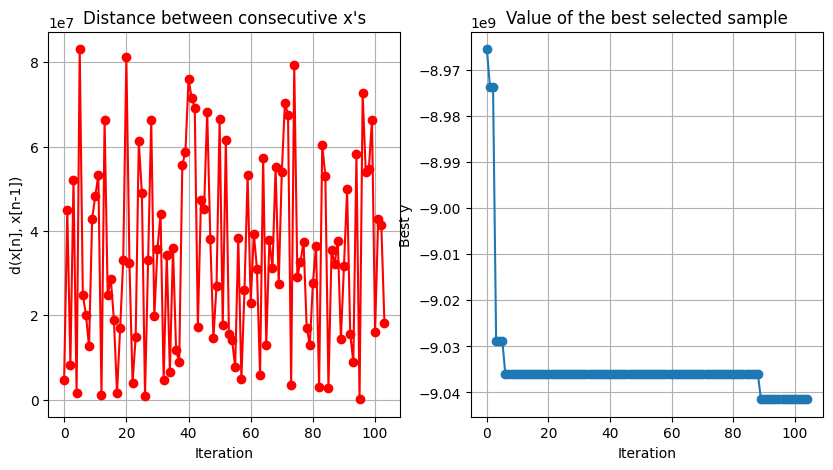

[8.00000028e+06 9.58081493e+07 3.71193054e+01 8.33104922e+00
 8.61503795e-01] -9041463465.408825


In [77]:
# Plot the acquisition function
my_opt.plot_acquisition()

# Plot the convergence plot
my_opt.plot_convergence()

# 最良解(今まで見た中で最も成績が良かった評価値)を表示
print(my_opt.x_opt, my_opt.fx_opt)

# file save

In [70]:
#5. csvファイルの作成

with open("./result1.csv", "w") as f:
  f.write(f"i,X0 (cell),X0 (algae),N (cells),time (-),cell yield (-),μ (cells),μ (algae)\n")
  for i in range(run_number**2): # run_number: model実行回数
    f.write(f"{i},{list_input_X0_cell[i]},{list_input_X0_algae[i]},{list_output_X_cell[i]},{list_time_valance[i]},{list_cell_yield[i]},{list_u_cell[i]},{list_u_algae[i]}\n")

IndexError: list index out of range

In [ ]:
#5. csvファイルの作成

with open("./result2.csv", "w") as f:
  f.write(f"i,Cglc_cell,Cglc_algae,Clac_cell,Clac_algae,Cgln_cell,Cgln_algae,Camm_cell,Camm_algae,Casp_cell,Cthr_cell,Cser_cell,Casn_cell,Cglu_cell,Cpro_cell,Cgly_cell,Cala_cell,Cval_cell,Ccys_cell,Cmet_cell,Cile_cell,Cleu_cell,Ctyr_cell,Cphe_cell,Chis_cell,Ctrp_cell,Clys_cell,Carg_cell,Casp_algae,Cthr_algae,Cser_algae,Casn_algae,Cglu_algae,Cpro_algae,Cgly_algae,Cala_algae,Cval_algae,Ccys_algae,Cmet_algae,Cile_algae,Cleu_algae,Ctyr_algae,Cphe_algae,Chis_algae,Ctrp_algae,Clys_algae,Carg_algae\n")
  for i in range(run_number**2): # run_number: model実行回数
    f.write(f"{i},{param_values[i][0]},{param_values[i][1]},{param_values[i][2]},{param_values[i][3]},{param_values[i][4]},{param_values[i][5]},{param_values[i][6]},{param_values[i][7]},{param_values[i][8]},{param_values[i][9]},{param_values[i][10]},{param_values[i][11]},{param_values[i][12]},{param_values[i][13]},{param_values[i][14]},{param_values[i][15]},{param_values[i][16]},{param_values[i][17]},{param_values[i][18]},{param_values[i][19]},{param_values[i][20]},{param_values[i][21]},{param_values[i][22]},{param_values[i][23]},{param_values[i][24]},{param_values[i][25]},{param_values[i][26]},{param_values[i][27]},{param_values[i][28]},{param_values[i][29]},{param_values[i][30]},{param_values[i][31]},{param_values[i][32]},{param_values[i][33]},{param_values[i][34]},{param_values[i][35]},{param_values[i][36]},{param_values[i][37]},{param_values[i][38]},{param_values[i][39]},{param_values[i][40]},{param_values[i][41]},{param_values[i][42]},{param_values[i][43]},{param_values[i][44]},{param_values[i][45]}\n")

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import numpy as np


X = np.array(list_input_X0_cell)
Y = np.array(list_input_X0_algae)
Z = np.array(list_output_X_cell)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X, Y, Z, color='blue')

ax.set_xlabel('initial cell density of animal cells (cells/L)')
ax.set_ylabel('initial cell density of algae (cells/L)')
ax.set_zlabel('Number of cells (cells)')


plt.show()

In [ ]:
X = np.array(list_input_X0_cell)
Y = np.array(list_input_X0_algae)
Z = np.array(list_cell_yield)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X, Y, Z, color='blue')

ax.set_xlabel('initial cell density of animal cells (cells/L)')
ax.set_ylabel('initial cell density of algae (cells/L)')
ax.set_zlabel('Cell yield (-)')


plt.show()

In [ ]:
x = np.array(list_input_X0_cell)
y = np.array(list_input_X0_algae)
X, Y = np.meshgrid(x, y)
Z = np.array(list_cell_yield)


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

ax=ax1.plot_surface(X, Y, Z, cmap='jet',label="z")

ax.set_xlabel('initial cell density of animal cells (cells/L)')
ax.set_ylabel('initial cell density of algae (cells/L)')
ax.set_zlabel('Cell yield (-)')


plt.show()